# Clasificación y Análisis de Objetos Astronómicos

## Estructura del Conjunto de Datos

El conjunto de datos de clasificación estelar contiene las siguientes columnas:

- `obj_ID`: Identificador del objeto.
- `alpha`: Ascensión recta (en grados).
- `delta`: Declinación (en grados).
- `u`, `g`, `r`, `i`, `z`: Medidas fotométricas en diferentes bandas del espectro (ultravioleta, verde, rojo, infrarrojo cercano, e infrarrojo lejano).
- `run_ID`, `rerun_ID`, `cam_col`, `field_ID`: Identificadores relacionados con la observación astronómica.
- `spec_obj_ID`: Identificador del objeto en el espectro.
- `class`: Clasificación del objeto (e.g., GALAXY, STAR, QSO).
- `redshift`: Medida del desplazamiento al rojo.
- `plate`, `MJD`, `fiber_ID`: Información adicional sobre las observaciones.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


## Análisis Preliminar

El análisis preliminar del conjunto de datos revela lo siguiente:

- **Valores Faltantes**: No hay valores faltantes en ninguna de las columnas.
- **Duplicados**: No se encontraron filas duplicadas en el conjunto de datos.
- **Resumen Estadístico**:
  - Las columnas `u` y `z` tienen valores mínimos de -9999, lo que parece ser un marcador de valor faltante o erróneo.
  - Las columnas `alpha`, `delta`, `u`, `g`, `r`, `i`, `z` muestran una amplia gama de valores, lo cual es esperado dada su naturaleza (coordenadas celestes y mediciones fotométricas).
  - `redshift` varía desde -0.009971 hasta 7.011245, lo cual es típico en estudios astronómicos.
  - Las columnas `run_ID`, `rerun_ID`, `cam_col`, `field_ID`, `spec_obj_ID`, `plate`, `MJD`, y `fiber_ID` son identificadores y datos de observación, con sus propias distribuciones específicas.

In [3]:
# Verificación de valores faltantes
missing_values = df.isnull().sum()
# Verificación de duplicados
duplicate_rows = df.duplicated().sum()

print(missing_values)
print('------------')
print('duplicated', duplicate_rows)
print('------------')
# Resumen estadístico básico para tener una idea inicial de la distribución de cada variable
df.describe()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64
------------
duplicated 0
------------


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [4]:
# Localizando las filas con valores extremos en 'u' o 'z'
filas_con_valores_extremos = df[(df['u'] == -9999) | (df['z'] == -9999)]
filas_con_valores_extremos

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
79543,1.237649e+18,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,752,301,2,537,3.731277e+18,STAR,0.000089,3314,54970,162


## Limpieza de Datos: Eliminación de Valores Extremos

He eliminado la fila con los valores extremos en `u` y `z` del conjunto de datos. Tras la eliminación, el conjunto de datos ahora consta de 99,999 filas. El resumen estadístico muestra que los valores extremos de -9999 en las columnas `u` y `z` ya no están presentes, y el resto de las estadísticas parece coherente con el conjunto de datos original.


In [5]:
# Encontrar el índice de la fila con valores extremos en 'u' o 'z'
indices_extremos = df[(df['u'] == -9999) | (df['z'] == -9999)].index

# Eliminar la fila
df_filter1=df.drop(indices_extremos)

# Verificando el resultado
df_filter1.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000
mean,1.237665e+18,177.628653,24.135552,22.080679,20.631583,19.645777,19.084865,18.768988,4481.403354,301.0,3.511625,186.127011,5.783903e+18,0.576667,5137.027890,55588.653687,449.315613
std,8.438450e+12,96.502612,19.644608,2.251068,2.037384,1.854763,1.757900,1.765982,1964.739021,0.0,1.586913,149.007687,3.324026e+18,0.730709,2952.312485,1808.492217,272.498252
min,1.237646e+18,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.517698,5.147477,20.352410,18.965240,18.135795,17.732280,17.460830,3187.000000,301.0,2.000000,82.000000,2.844137e+18,0.054522,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900527,23.646462,22.179140,21.099930,20.125310,19.405150,19.004600,4188.000000,301.0,4.000000,146.000000,5.614896e+18,0.424176,4987.000000,55869.000000,433.000000
75%,1.237668e+18,233.895005,39.901582,23.687480,22.123775,21.044790,20.396510,19.921120,5326.000000,301.0,5.000000,241.000000,8.332365e+18,0.704172,7400.500000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


## Cuantificación por clases

In [6]:
df["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

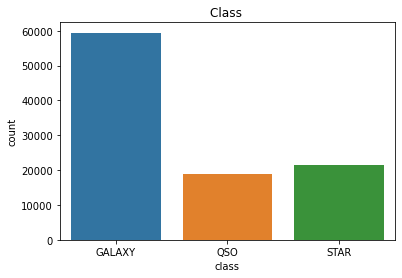

In [7]:
sns.countplot(x=df["class"])
plt.title("Class ")
plt.show()

## Selección de variables

Vamos a intentar entender más a fondo que describe cada una de las variables y así poder seleccionar aquellas que aporten información relevante:

1. **obj_ID**: Identificador del objeto. Parece ser un identificador único para cada estrella y, por lo tanto, probablemente no sea útil para el análisis predictivo. Lo descartamos.

2. **alpha** y **delta**: Coordenadas astronómicas (ascensión recta y declinación). Estas podrían ser relevantes si la posición en el cielo está correlacionada con el tipo de estrella, aunque esto es menos común en la clasificación estelar. Las estudiaremos más adelante.

3. **u, g, r, i, z**: Magnitudes en diferentes bandas del espectro (ultravioleta, verde, rojo, infrarrojo cercano e infrarrojo). Estas son mediciones de la intensidad de la luz en diferentes longitudes de onda y son muy importantes en la clasificación estelar.

4. **run_ID, rerun_ID, cam_col, field_ID**: Estos parecen ser identificadores y configuraciones relacionadas con la observación astronómica (como la cámara y el campo de visión). Estos datos son más técnicos y probablemente no sean relevantes para la clasificación estelar. Los descartamos.

5. **spec_obj_ID**: Un identificador para el espectro del objeto. Al igual que con obj_ID, esto es más probable que sea un identificador único y no contribuya al análisis predictivo. Lo descartamos

6. **class**: Esta es la variable objetivo, indicando la clasificación de la estrella.

7. **redshift**: Desplazamiento hacia el rojo, una medida de cómo la expansión del universo ha estirado la luz de la estrella. Puede ser muy relevante para la clasificación, especialmente para distinguir galaxias.

8. **plate, MJD, fiber_ID**: Estos son identificadores relacionados con la observación del espectro. No son útiles para la clasificación estelar. Los descartamos

Para la clasificación, las magnitudes en diferentes bandas del espectro `(u, g, r, i, z)` y posiblemente el `redshift` son las más relevantes. Las demás variables parecen ser mayormente identificadores técnicos o relacionados con la observación y no son útiles para el análisis predictivo. Mantenemos `alpha` y `delta` para ver si hay alguna correlción, aunque no debería si consideramos el espacio uniforme.



In [8]:
df_filter1 = df_filter1.drop(['obj_ID','run_ID','rerun_ID','cam_col','field_ID','fiber_ID','spec_obj_ID', 'plate', 'MJD'], axis = 1)

In [9]:
df_filter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   alpha     99999 non-null  float64
 1   delta     99999 non-null  float64
 2   u         99999 non-null  float64
 3   g         99999 non-null  float64
 4   r         99999 non-null  float64
 5   i         99999 non-null  float64
 6   z         99999 non-null  float64
 7   class     99999 non-null  object 
 8   redshift  99999 non-null  float64
dtypes: float64(8), object(1)
memory usage: 7.6+ MB


## Visualización de Datos

### Gráficos de densidad 
Para cada una de las variables fotométricas (u, g, r, i, z), así como para redshift, alpha (ascensión recta) y delta (declinación), segmentados por la clase del objeto astronómico (GALAXY, QSO, STAR). 

Cada gráfico muestra la distribución de la variable correspondiente para cada tipo de objeto, lo que te permite observar diferencias y similitudes entre las clases.

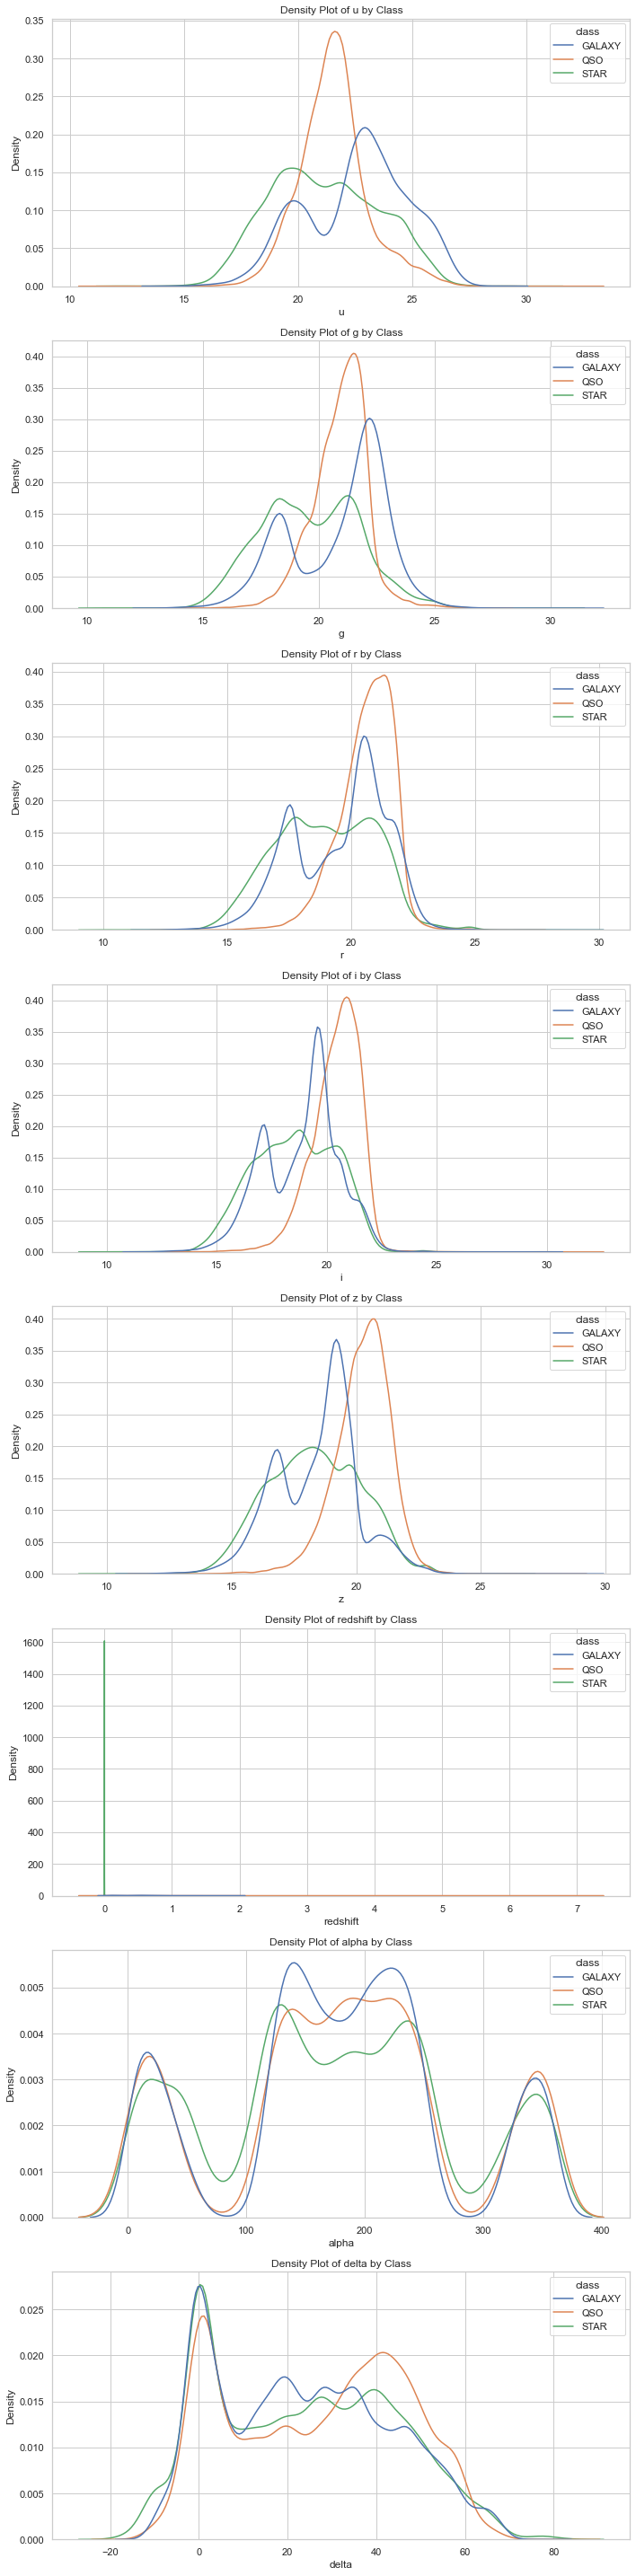

In [10]:
# Configuración para las visualizaciones
sns.set(style="whitegrid")

# Lista de variables fotométricas y astronómicas para visualizar (todas menos class)
variables_to_plot = ['u', 'g', 'r', 'i', 'z', 'redshift', 'alpha', 'delta']

# Crear una figura y un conjunto de subtramas
fig, axes = plt.subplots(len(variables_to_plot), 1, figsize=(10, 5 * len(variables_to_plot)))

# Graficar un gráfico de densidad para cada variable, segmentado por la clase de objeto astronómico
for i, var in enumerate(variables_to_plot):
    sns.kdeplot(data=df_filter1, x=var, hue="class", ax=axes[i], common_norm=False)
    axes[i].set_title(f'Density Plot of {var} by Class')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Density')

# Ajustar el layout
plt.tight_layout()
plt.show()


## Problemas de visualización de `redshift`

En la gráfica de densidad de `redshift` podemos ver que esta se ecuentra dominada por los valores extremadamente bajos. Esto hace que sea difícil discernir cualquier detalle de la distribución, ya que todos los datos se aglomeran en un pico estrecho y alto cerca de cero.

La transformación logarítmica hace que los valores altos se compriman y los valores bajos se expandan, mejorando así la interpretabilidad del gráfico.


/Users/alvarogonzalezgonzalez/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/alvarogonzalezgonzalez/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


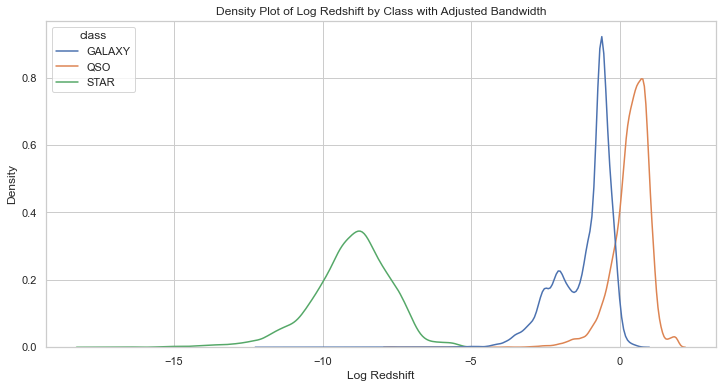

In [11]:
# Aplicar el logaritmo natural a la columna 'redshift'
df_filter1['log_redshift'] = np.log(df_filter1['redshift'])

# Crear el gráfico de densidad con la columna transformada
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_filter1, x='log_redshift', hue="class", common_norm=False)
plt.title('Density Plot of Log Redshift by Class with Adjusted Bandwidth')
plt.xlabel('Log Redshift')
plt.ylabel('Density')
plt.show()


In [12]:
df_filter1 = df_filter1.drop(['log_redshift'], axis = 1)

## Análisis de Correlación
- Se transformó la columna `class` a valores numéricos para análisis de correlación.

- Se generará un mapa de calor para visualizar las correlaciones entre las diferentes variables, incluyendo la correlación con la clase del objeto.

In [13]:
df_filter1["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in df_filter1["class"]]


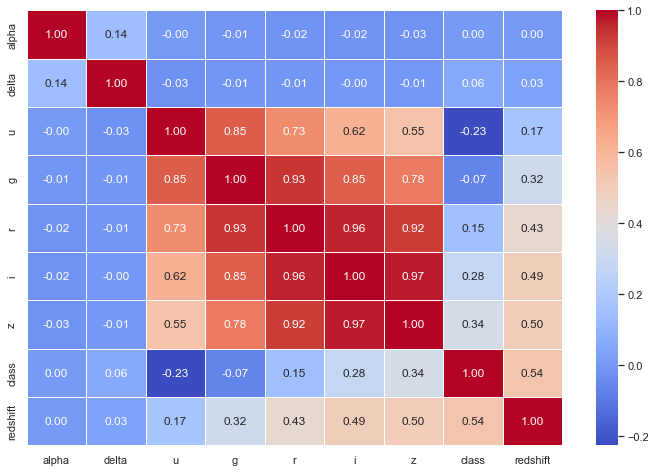

In [14]:
import seaborn as sns
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_filter1.corr(), cmap="coolwarm", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [15]:
print('Correlación de Pearson:')
print('')
corr = df_filter1.corr()
print(corr["class"].sort_values())


Correlación de Pearson:

u          -0.226930
g          -0.066894
alpha       0.004549
delta       0.056650
r           0.150696
i           0.284400
z           0.340914
redshift    0.536829
class       1.000000
Name: class, dtype: float64


## Ampliación del Análisis de Correlación

En esta sección, ampliaremos el análisis de correlación para incluir no solo la correlación lineal (coeficiente de Pearson), sino también otros tipos de correlaciones que pueden capturar relaciones no lineales. Esto incluirá el coeficiente de correlación de Spearman y Kendall.

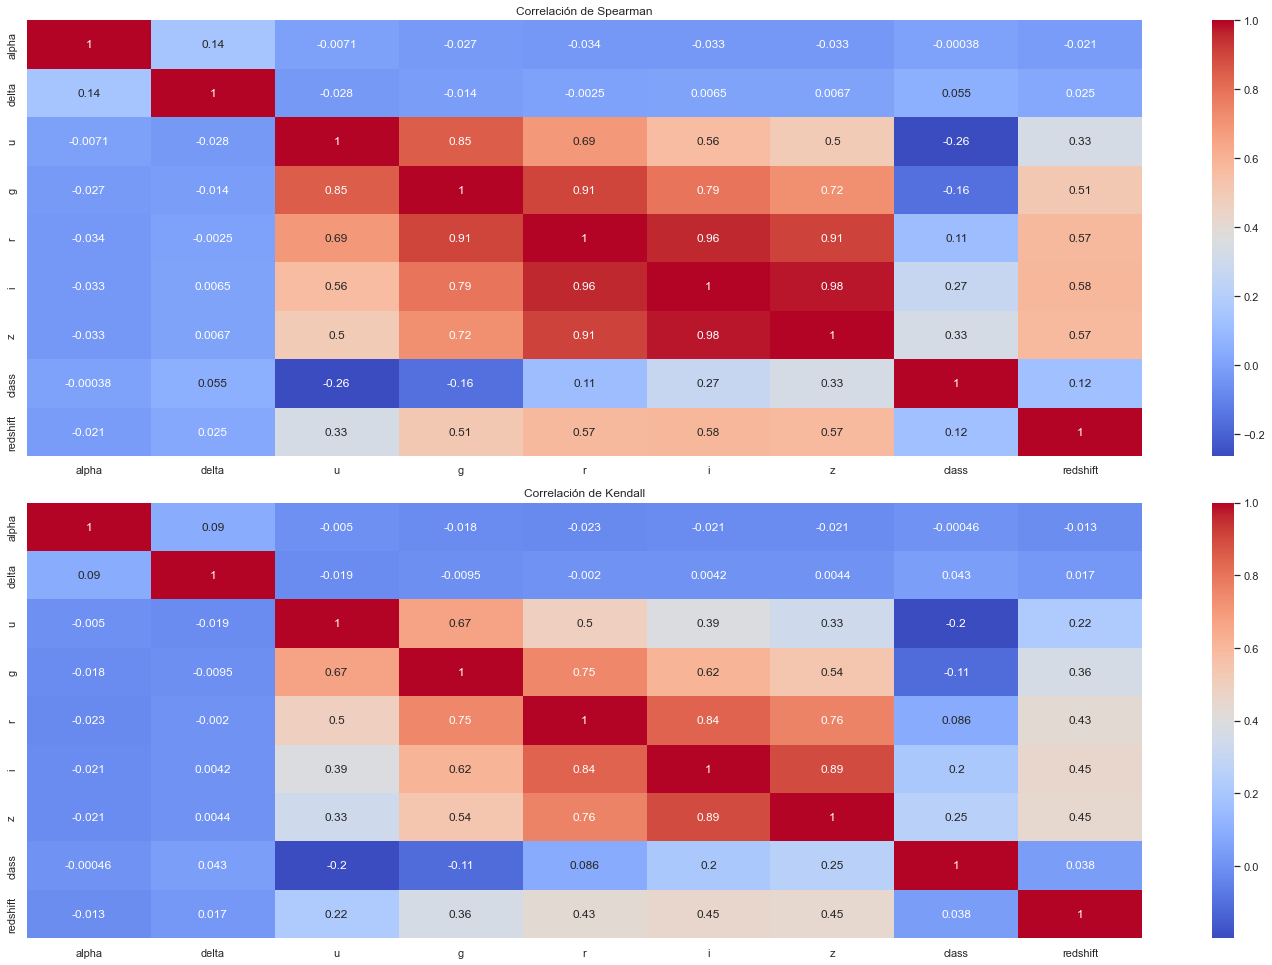

Correlación de Spearman:

u          -0.264588
g          -0.160547
alpha      -0.000381
delta       0.054690
r           0.109301
redshift    0.122873
i           0.267532
z           0.329356
class       1.000000
Name: class, dtype: float64

Correlación de Kendall:

u          -0.199659
g          -0.114941
alpha      -0.000465
redshift    0.038241
delta       0.042552
r           0.086103
i           0.204739
z           0.251733
class       1.000000
Name: class, dtype: float64


In [16]:
# Calculando correlaciones de Spearman y Kendall
correlation_pearson = df_filter1.corr()
correlation_spearman = df_filter1.corr(method='spearman')
correlation_kendall = df_filter1.corr(method='kendall')

# Visualización de las correlaciones
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))


plt.subplot(3, 1, 1)
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm')
plt.title('Correlación de Spearman')

plt.subplot(3, 1, 2)
sns.heatmap(correlation_kendall, annot=True, cmap='coolwarm')
plt.title('Correlación de Kendall')
plt.tight_layout()
plt.show()

print('Correlación de Spearman:')
print('')
corr = df_filter1.corr(method='spearman')
print(corr["class"].sort_values())
print('')
print('Correlación de Kendall:')
print('')
corr = df_filter1.corr(method='kendall')
print(corr["class"].sort_values())

## Conclusiones del Análisis de Correlación

- Correlaciones Negativas con `u` y `g`: Los valores negativos en las correlaciones de `u` y `g` con la clase indican que a medida que aumentan estas magnitudes en el espectro ultravioleta y verde, respectivamente, hay una tendencia a cambiar la clasificación de la estrella. Esto sugiere que estas bandas espectrales tienen un papel inverso en la determinación de la clase de estrella.

- Correlaciones Positivas con `r`, `i`, `z`: Esto implica que las estrellas con mayor intensidad en estas bandas espectrales tienden a pertenecer a categorías específicas, diferenciándose así de otras clases.

- Redshift: La variable `redshift` muestra una correlación positiva significativa, especialmente en la correlación de Pearson, lo que indica que esta medida es importante para clasificar las estrellas. Un mayor desplazamiento hacia el rojo podría estar asociado con características específicas de las estrellas que afectan su clasificación.

- Baja Relevancia de Coordenadas Astronómicas: Las coordenadas astronómicas `alpha` y `delta` muestran correlaciones muy bajas con la clase, lo que indica que la posición de las estrellas en el cielo no es un factor determinante para su clasificación en este conjunto de datos. Las descartamos.

In [17]:
df_filter1 = df_filter1.drop(['alpha', 'delta'], axis = 1)

In [18]:
df_filter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   u         99999 non-null  float64
 1   g         99999 non-null  float64
 2   r         99999 non-null  float64
 3   i         99999 non-null  float64
 4   z         99999 non-null  float64
 5   class     99999 non-null  int64  
 6   redshift  99999 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 6.1 MB


## Modelado de Datos

La elección del método de **regresión logística multinomial** para este proyecto de clasificación estelar se justifica por las siguientes razones:

1. **Naturaleza de la Variable Objetivo**: La variable objetivo, `class`, es categórica y nominal, con más de dos categorías. La regresión logística multinomial es específicamente diseñada para tratar con variables dependientes nominales multiclase, lo que la hace adecuada para este tipo de datos.

2. **Modelado de Probabilidades**: A diferencia de otros métodos de clasificación, la regresión logística multinomial no solo clasifica las observaciones en distintas categorías, sino que también proporciona probabilidades para cada categoría. Esto es útil para entender no solo la clasificación más probable, sino también qué tan seguros podemos estar de esa clasificación.

3. **Interpretabilidad**: Los modelos de regresión logística ofrecen una alta interpretabilidad. Puedes entender el efecto de cada variable independiente en la probabilidad de que una observación pertenezca a una categoría específica. Esto es valioso en el ámbito científico y de investigación, donde no solo se busca predecir sino también entender las relaciones subyacentes.

4. **Flexibilidad con Variables Independientes**: Este método puede manejar tanto variables independientes continuas (como las magnitudes en diferentes bandas del espectro y el redshift) como categóricas. Además, no se requiere que las relaciones entre las variables independientes y la dependiente sean lineales, lo que proporciona una flexibilidad adicional.

5. **Buen Desempeño con Tamaños de Muestra Grandes**: La regresión logística tiende a funcionar bien en situaciones con tamaños de muestra grandes, que es a menudo el caso en los estudios astronómicos.

6. **Prevención del Sobreajuste**: A través de técnicas como la regularización, la regresión logística multinomial puede ser ajustada para prevenir el sobreajuste, lo que es crucial para garantizar que el modelo generalice bien a nuevos datos.

En resumen, la regresión logística multinomial es una opción sólida y justificada para la clasificación estelar en este proyecto, dada la naturaleza de la variable objetivo, la necesidad de interpretabilidad y la naturaleza de las variables independientes.


## División del Conjunto de Datos
Vamos a normalizar las características usando `StandardScaler` para mejorar el rendimiento de los algoritmos de aprendizaje automático. Después dividimos el conjunto de datos en subconjuntos de entrenamiento y prueba, asignando el 30% de los datos al conjunto de prueba y el 70% al conjunto de entrenamiento.

In [19]:
x = df_filter1.drop(['class'], axis = 1)
y = df_filter1['class']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


> *Nota: Cómo usar `StandardScaler` correctamente:*
> 1. *Es importante ajustar el escalador (fit) solo en el conjunto de entrenamiento y no en el conjunto de prueba completo. Esto es para evitar el "data leakage", es decir, la fuga de información del conjunto de prueba al modelo durante el entrenamiento.*
> 2. *Después de ajustar el escalador en el conjunto de entrenamiento, lo usas para transformar tanto el conjunto de entrenamiento como el de prueba.* 

## Entrenamiento y evaluación del modelo
 Calculamos el rendimiento del modelo. Vemos que es de un 95%.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo de regresión logística
logistic_model = LogisticRegression(max_iter=1000) # Con menos iteraciones tenemos problemas de convergencia.
logistic_model.fit(x_train_scaled, y_train)

# Realizar predicciones
y_pred = logistic_model.predict(x_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


In [32]:
from sklearn.metrics import accuracy_score

# Evaluar en el conjunto de entrenamiento
y_train_pred = logistic_model.predict(x_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluar en el conjunto de prueba
y_test_pred = logistic_model.predict(x_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 0.9550422148887842
Test Accuracy: 0.9567


Parece que el modelo está funcionando bien y no muestra signos claros de sobreajuste o ajuste insuficiente:

1. **Sin Sobreajuste Significativo**:
El modelo tiene un rendimiento similar en los conjuntos de entrenamiento y prueba. Esto es una buena señal, ya que sugiere que el modelo generaliza bien a nuevos datos, es decir, no ha aprendido el "ruido" específico del conjunto de entrenamiento.

2. **Sin Ajuste Insuficiente**:
Las altas puntuaciones de precisión en ambos conjuntos indican que el modelo es lo suficientemente complejo como para capturar las tendencias subyacentes en los datos.

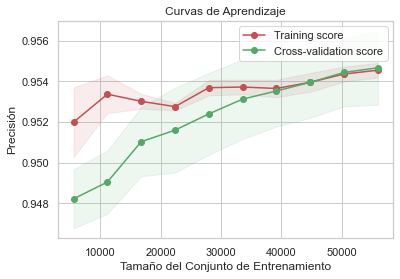

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    logistic_model, x_train_scaled, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular media y desviación estándar del score de entrenamiento y de prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Dibujar curvas
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Curvas de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.show()

### Análisis de la Curva de Aprendizaje

- **Convergencia y Estabilidad**: La convergencia de las curvas de entrenamiento y validación cruzada, junto con la pequeña y consistente brecha entre ellas, sugiere un buen equilibrio entre sesgo y varianza. El modelo muestra estabilidad y rendimiento consistente con una precisión cercana al 96%, indicando que no hay sobreajuste significativo.

- **Rendimiento con Más Datos**: La precisión mejora con los primeros incrementos en el tamaño del conjunto de entrenamiento, pero se estabiliza rápidamente, lo que implica un potencial limitado de mejora con la adición de más datos. Esto sugiere que el modelo ha aprendido las tendencias principales y que aumentar el conjunto de datos probablemente no llevará a ganancias significativas en precisión.




## Ajuste de hiperparámetros
El ajuste de hiperparámetros es un proceso crucial en el aprendizaje automático para mejorar el rendimiento de un modelo. En Scikit-learn, esto se puede hacer de manera eficiente utilizando herramientas como GridSearchCV

### Hiperparámetros a Considerar:

- C: Este es el parámetro de regularización inversa. Valores más bajos indican más regularización.
- solver: El algoritmo utilizado para la optimización.
- penalty: El tipo de regularización (l1, l2, etc.).
- max_iter: Número máximo de iteraciones tomadas para que los solucionadores converjan.

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Definición del espacio de búsqueda
param_distributions = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag'],  # Estos solucionadores son compatibles con 'l2' y 'none'.
    'penalty': ['l2', 'none'],  # Solo incluimos penalizaciones compatibles con los solucionadores seleccionados.
    'max_iter': [1000, 2000]  # Valores más altos para asegurar la convergencia.
}

# Configuración de RandomizedSearchCV
random_search = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_distributions,
    n_iter=10,  # Puedes ajustar este número en función de cuánto tiempo quieras dedicar a la búsqueda.
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=0
)

# Ejecución de RandomizedSearchCV
random_search.fit(x_train_scaled, y_train)

# Resultados de RandomizedSearchCV
print("Mejores hiperparámetros:", random_search.best_params_)
best_model = random_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(x_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred)
print(f"Mejor precisión de prueba: {best_accuracy}")



Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/alvarogonzalezgonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvarogonzalezgonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvarogonzalezgonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/alvarogonzalezgonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alvarogonzalezgonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

Mejores hiperparámetros: {'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 1000, 'C': 1}
Mejor precisión de prueba: 0.9625


## Importancia y Correlación de las Características
 
 - La **correlación** simplemente mide la relación lineal entre dos variables. En estadísticas, los coeficientes de correlación varían entre -1 y 1

 - La **importancia** de una característica en un modelo de aprendizaje automático se refiere a cuánto contribuye la característica a la capacidad predictiva del modelo. En un modelo de regresión logística, por ejemplo, se mide por el tamaño del coeficiente asociado a esa característica.

 - A diferencia de la **correlación**, que es una medida estadística general, la **importancia** de una característica está directamente relacionada con un modelo específico y cómo se utiliza esa característica dentro del modelo para hacer predicciones.

 - La **importancia** puede capturar la utilidad de una característica en presencia de otras características, incluyendo interacciones que la **correlación** por sí sola no puede detectar.

In [41]:
# Obteniendo probabilidades para cada clase
probabilidades = best_model.predict_proba(x_test_scaled)

# Obteniendo los coeficientes del modelo
coeficientes = best_model.coef_


importancia_caracteristicas = np.sum(np.abs(coeficientes), axis=0)

# Imprimir los coeficientes o la importancia de las características
print("Coeficientes del modelo:", coeficientes)
print("Importancia de las características:", importancia_caracteristicas)


Coeficientes del modelo: [[ 2.74192962e-01  9.63099851e-01  1.25297449e-01 -6.17847812e-01
  -1.06198619e-01  1.92121341e+02]
 [ 6.25416310e-01  9.68011368e-02  4.81856206e-01 -8.24390978e-01
  -2.33226544e-01 -3.88193452e+02]
 [-8.99609272e-01 -1.05990099e+00 -6.07153655e-01  1.44223879e+00
   3.39425163e-01  1.96072110e+02]]
Importancia de las características: [1.79921854e+00 2.11980197e+00 1.21430731e+00 2.88447758e+00
 6.78850326e-01 7.76386903e+02]


In [42]:
nombres_caracteristicas = x_train.columns

# Ahora crea un DataFrame para visualizar la importancia de cada característica
importancia_caracteristicas = np.sum(np.abs(coeficientes), axis=0)
importancias_df = pd.DataFrame({
    'Caracteristica': nombres_caracteristicas,
    'Importancia': importancia_caracteristicas
}).sort_values(by='Importancia', ascending=False)

# Mostrar las características más importantes
print(importancias_df)

  Caracteristica  Importancia
5       redshift   776.386903
3              i     2.884478
1              g     2.119802
0              u     1.799219
2              r     1.214307
4              z     0.678850


La variable **redshift**, con una importancia de aproximadamente 829 es, con mucho, la más influyente en el modelo. Esto indica que **redshift** tiene el mayor efecto en la probabilidad de que una observación sea clasificada en una clase particular en comparación con las otras características. Dada su gran magnitud, esta característica es probablemente un factor decisivo en las predicciones del modelo.

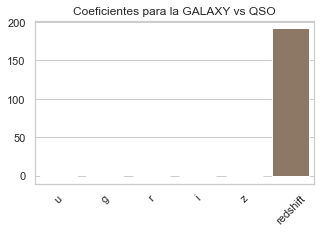

----------


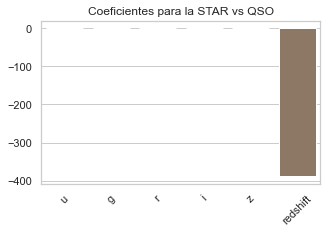

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'coeficientes' es un arreglo numpy con los coeficientes del modelo y 'nombres_caracteristicas' contiene los nombres de tus características

# Coeficientes para la GALAXY vs QSO
plt.figure(figsize=(5, 3))
sns.barplot(x=nombres_caracteristicas, y=coeficientes[0])
plt.xticks(rotation=45)
plt.title("Coeficientes para la GALAXY vs QSO")
plt.show()

print('----------')
# Coeficientes para la STAR vs QSO
plt.figure(figsize=(5, 3))
sns.barplot(x=nombres_caracteristicas, y=coeficientes[1])
plt.xticks(rotation=45)
plt.title("Coeficientes para la STAR vs QSO")
plt.show()

## Matriz de Confusión e Informe de Clasificación

1. Matriz de confusión
- Verdaderos Positivos (TP): Observaciones correctamente clasificadas como positivas.
- Falsos Positivos (FP): Observaciones incorrectamente clasificadas como positivas.
- Verdaderos Negativos (TN): Observaciones correctamente clasificadas como negativas.
- Falsos Negativos (FN): Observaciones incorrectamente clasificadas como negativas.


2. Informe de Clasificación:
- Precisión: Proporción de identificaciones positivas que fueron correctas (TP / (TP + FP)).
- Recall (Sensibilidad): Proporción de positivos reales que fueron identificados correctamente (TP / (TP + FN)).
- F1-Score: Media armónica de precisión y recall. Es útil cuando se busca un equilibrio entre precisión y recall.

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

# Crear y mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Mostrar el informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de Clasificación:\n", report)

Matriz de Confusión:
 [[17409   160   292]
 [    0  6448     0]
 [  672     1  5018]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     17861
           1       0.98      1.00      0.99      6448
           2       0.95      0.88      0.91      5691

    accuracy                           0.96     30000
   macro avg       0.96      0.95      0.96     30000
weighted avg       0.96      0.96      0.96     30000



### Matriz de Confusión
La matriz de confusión para tus tres clases (0, 1, 2) es la siguiente:



- **Clase 0 (GALAXY)**: De 17861 observaciones reales, 17409 fueron clasificadas correctamente como GALAXY, 160 fueron clasificadas incorrectamente como STAR, y 292 como QSO.
- **Clase 1 (STAR)**: De 6448 observaciones reales, todas las 6448 fueron clasificadas correctamente como STAR.
- **Clase 2 (QSO)**: De 5691 observaciones reales, 5018 fueron clasificadas correctamente como QSO, 1 como STAR, y 672 fueron clasificadas incorrectamente como GALAXY.

### Informe de Clasificación

- **Clase 0 (GALAXY)**:
  - **Precisión**: 96% (La mayoría de las predicciones de GALAXY son correctas).
  - **Recall**: 97% (La mayoría de las GALAXY reales fueron identificadas correctamente).
  - **F1-score**: 97% (Un buen equilibrio entre precisión y recall).

- **Clase 1 (STAR)**:
  - **Precisión**: 98% (Casi todas las predicciones de STAR son correctas).
  - **Recall**: 100% (Todas las STAR reales fueron identificadas correctamente).
  - **F1-score**: 99% (Excelente equilibrio entre precisión y recall).

- **Clase 2 (QSO)**:
  - **Precisión**: 95% (La mayoría de las predicciones de QSO son correctas).
  - **Recall**: 88% (Una buena proporción de QSO reales fueron identificadas correctamente, aunque hay margen de mejora).
  - **F1-score**: 91% (Un buen equilibrio entre precisión y recall).

### Interpretación General

- **Alto Rendimiento en General**: Tu modelo tiene un rendimiento general alto con una precisión y un recall altos para todas las clases.
- **Mejor Rendimiento para la Clase STAR**: La clase STAR (1) es la que mejor predice el modelo, con la más alta precisión y recall.
- **Algunas Confusiones entre GALAXY y QSO**: Hay una cantidad significativa de confusiones entre GALAXY (0) y QSO (2). Es posible que características similares entre estas dos clases estén causando estas confusiones.
- **Alta Exactitud General**: La exactitud general del modelo es del 96%, lo que indica un alto grado de precisión en las predicciones.
